In [20]:
from radd import build, vis, fit

In [4]:
%cd /Users/kyle/Dropbox/FinalRe/

#pd.read_csv('')

/Users/kyle/Dropbox/FinalRe


In [68]:
a = pd.read_csv('aii/xradd_a_bootinfo.csv')
tr = pd.read_csv('trii/xradd_tr_bootinfo.csv')
v = pd.read_csv('vii/xradd_v_bootinfo.csv')
vtr = pd.read_csv('vtrii/xradd_vtr_bootinfo.csv')

In [70]:
v.AIC.min()

-273.560542527

In [44]:
v_inits = v.mean().T['a':'z'].to_dict()
v_inits['v'] = np.array([v_inits['v_bsl'], v_inits['v_pnl']])

In [35]:
tr_inits=tr.mean().T['a':'z'].to_dict()
tr_inits['tr'] = array([tr_inits['tr_bsl'], tr_inits['tr_pnl']])

In [40]:
a_inits=a.mean().T['a_bsl':'z'].to_dict()
a_inits['a'] = array([a_inits['a_bsl'], a_inits['a_pnl']])

In [50]:
ma = build.Model(data=redata, kind='xradd', depends_on={'a':'Cond'}, inits=a_inits)
ma.fits=ma.simulate()

In [51]:
mv = build.Model(data=redata, kind='xradd', depends_on={'v':'Cond'}, inits=v_inits)
mv.fits=mv.simulate()

In [52]:
mtr = build.Model(data=redata, kind='xradd', depends_on={'tr':'Cond'}, inits=tr_inits)
mtr.fits=mtr.simulate()

In [33]:
m.simulate()

array([ 0.9813 ,  1.     ,  0.9996 ,  0.93   ,  0.517  ,  0.1064 ,
        0.51238,  0.54138,  0.56138,  0.58038,  0.61138,  0.50338,
        0.52838,  0.54638,  0.56438,  0.59138,  0.9568 ,  1.     ,
        1.     ,  0.9586 ,  0.6024 ,  0.1652 ,  0.52538,  0.55238,
        0.57138,  0.59138,  0.62238,  0.51238,  0.53738,  0.55538,
        0.57138,  0.59638])

In [31]:
m = build.Model(data=redata, kind='xradd', depends_on={'v':'Cond'}, inits=inits)
m.popt=inits
m.fits=m.simulate()

In [55]:
mtr.inits

{'a': array([ 0.45947,  0.45947]),
 'ssv': -1.0761309920000004,
 'tr': array([ 0.25292,  0.25727], dtype=float32),
 'tr_bsl': 0.25292157310096991,
 'tr_pnl': 0.25726793611434007,
 'v': array([ 1.19923,  1.19923]),
 'xb': array([ 1.29415,  1.29415]),
 'z': 0.081261638979999967}

In [54]:
vis.react_fit_plots(mtr)

In [53]:
vis.react_fit_plots(ma)

In [10]:
a.mean().T

cnvrg      0.7500
logp    -250.5424
chi        0.0694
rchi       0.0023
AIC     -246.5424
BIC     -246.3836
a_bsl      0.4845
a_pnl      0.5054
v          1.2170
ssv       -1.0911
xb         1.3044
tr         0.2446
z          0.0804
dtype: float64

In [9]:
tr.mean().T

cnvrg       0.7300
logp     -247.1457
chi         0.0362
rchi        0.0012
AIC      -243.1457
BIC      -242.9868
a           0.4595
v           1.1992
tr_bsl      0.2529
tr_pnl      0.2573
ssv        -1.0761
xb          1.2941
z           0.0813
dtype: float64

In [8]:
tr[tr.AIC==tr.AIC.min()].T

,41
cnvrg,True
logp,-288.52
chi,0.0036423
rchi,0.00012141
AIC,-284.52
BIC,-284.36
a,0.44534
v,0.96577
tr_bsl,0.29804
tr_pnl,0.30929


In [38]:
print a.AIC.mean()
print tr.AIC.mean()

-246.542446121
-243.145715448


In [39]:
v.AIC.mean()

-267.92732914633

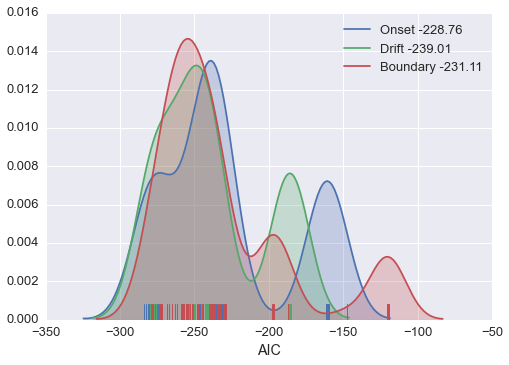

In [24]:
sns.set(font_scale=1.3, context='notebook')

muv=v.mean().AIC
mutr=tr.mean().AIC
mua=a.mean().AIC


sns.distplot(tr.AIC, label=' '.join(['Onset', str(mutr)[:7]]), kde_kws={'shade':True}, hist=False, rug=True)

sns.distplot(v.AIC, label=' '.join(['Drift', str(muv)[:7]]), kde_kws={'shade':True}, hist=False, rug=True)

sns.distplot(a.AIC, label=' '.join(['Boundary', str(mua)[:7]]), kde_kws={'shade':True}, hist=False, rug=True)


plt.legend()
plt.savefig('reAIC.png')

In [9]:
v.mean().AIC

-239.01438674230008

In [10]:
tr.mean().AIC

-228.76200827169995

In [18]:

len(v[v['cnvrg']==True].AIC)

40

In [17]:
len(a[a['cnvrg']==True].AIC)

36

In [16]:
len(tr[tr['cnvrg']==True].AIC)

28

In [20]:
from scipy.stats import ttest_rel as rst

In [21]:
rst(v.AIC, tr.AIC)

(-9.2054757159444094, 3.8636042998726582e-14)

In [29]:
for df in [v, a, tr]:
      print df[df.AIC<-200].AIC.mean()

-256.754600913
-253.717896091
-251.435578851
